In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Fuel Cosumption - Sheet1.csv")

In [101]:
df.isnull().sum()

,0
year,0
make,0
model,0
vehicle_class,0
engine_size,0
cylinders,0
transmission,0
fuel,0
fuel_consumption,0
coemissions,0


In [ ]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df = df.dropna(subset=['fuel_consumption', 'coemissions'])
df = df.dropna()

print("Cleaned Data Shape:", df.shape)
print(df.head())



Cleaned Data Shape: (639, 10)
   year   make    model vehicle_class  engine_size  cylinders transmission  \
0  2000  ACURA    1.6EL       COMPACT          1.6          4           A4   
1  2000  ACURA    1.6EL       COMPACT          1.6          4           M5   
2  2000  ACURA    3.2TL      MID-SIZE          3.2          6          AS5   
3  2000  ACURA    3.5RL      MID-SIZE          3.5          6           A4   
4  2000  ACURA  INTEGRA    SUBCOMPACT          1.8          4           A4   

  fuel  fuel_consumption  coemissions  
0    X              10.5          216  
1    X               9.8          205  
2    Z              13.7          265  
3    Z              15.0          301  
4    X              11.4          230  


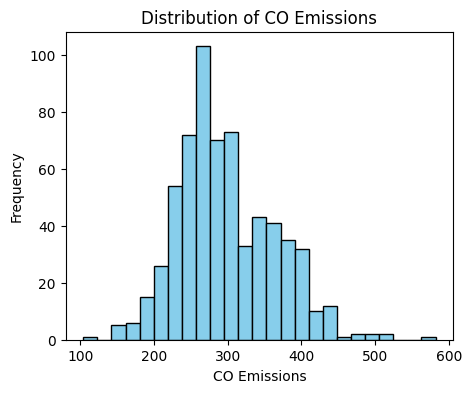

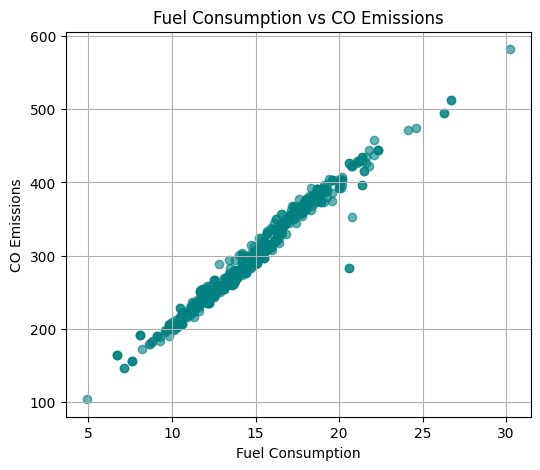

In [ ]:
plt.figure(figsize=(5,4))
plt.hist(df['coemissions'], bins=25, color='skyblue', edgecolor='black')
plt.title("Distribution of CO Emissions")
plt.xlabel("CO Emissions")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(6,5))
plt.scatter(df['fuel_consumption'], df['coemissions'], color='teal', alpha=0.6)
plt.title("Fuel Consumption vs CO Emissions")
plt.xlabel("Fuel Consumption")
plt.ylabel("CO Emissions")
plt.grid(True)
plt.show()


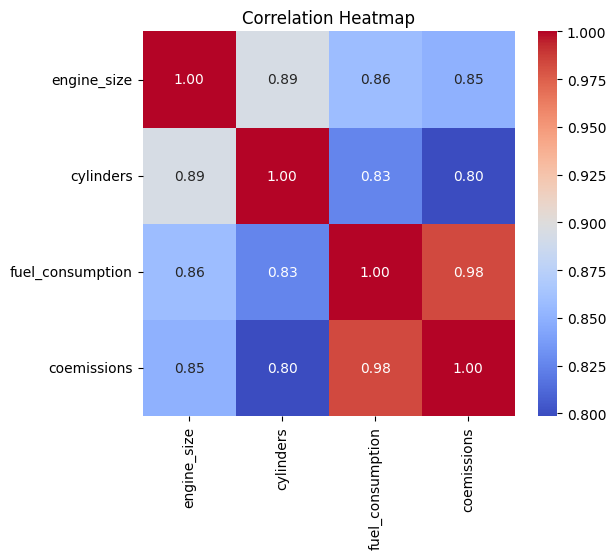

In [ ]:
num_df = df[['engine_size', 'cylinders', 'fuel_consumption', 'coemissions']]
plt.figure(figsize=(6,5))
sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
X = df[['fuel_consumption']]
y = df['coemissions']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred = model.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_[0])


R² Score: 0.9811220512094546
Intercept: 8.775482585266218
Coefficient: 19.57255199888622


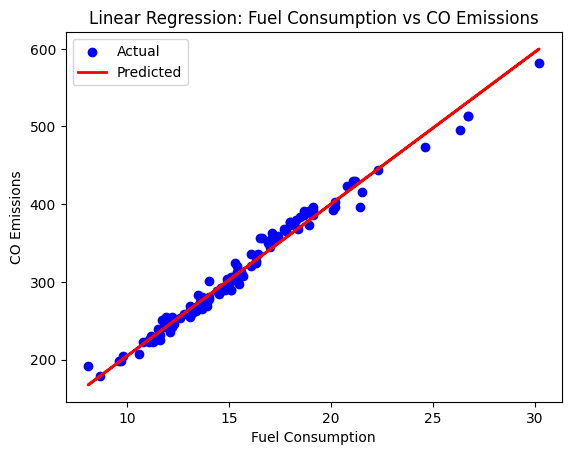

In [ ]:
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel("Fuel Consumption")
plt.ylabel("CO Emissions")
plt.title("Linear Regression: Fuel Consumption vs CO Emissions")
plt.legend()
plt.show()